In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [101]:
data = pd.read_csv('Salary_Data.csv')
pd.set_option('display.max_rows', None)

In [102]:
data.shape

(6704, 6)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [104]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Gender', 'Education Level', 'Job Title']

for col in cols_cat:
  print(f'Columna {col}: {data[col].unique()} subniveles\n')

Columna Gender: ['Male' 'Female' nan 'Other'] subniveles

Columna Education Level: ["Bachelor's" "Master's" 'PhD' nan "Bachelor's Degree" "Master's Degree"
 'High School' 'phD'] subniveles

Columna Job Title: ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative 

In [105]:
for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles\n')

Columna Gender: 3 subniveles

Columna Education Level: 7 subniveles

Columna Job Title: 193 subniveles



# Etapa 1 - Datos faltantes

In [106]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [107]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


# Etapa 2 - Columnas irrelevantes

### Renombramiento de columnas

In [108]:
data.rename(columns={'Education Level': 'Education_Level',
                      'Job Title': 'Job_Title',
                      'Years of Experience': 'Years_of_Experience'}, inplace= True)
data.columns

Index(['Age', 'Gender', 'Education_Level', 'Job_Title', 'Years_of_Experience',
       'Salary'],
      dtype='object')

### Transformación de valores a minúscula

In [109]:
columnas_categoricas = ['Gender', 'Education_Level', "Job_Title"]

#Se transforman en minúscula
for column in data.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in columnas_categoricas:
        data[column] = data[column].str.lower()

data.head()



,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,male,bachelor's,software engineer,5.0,90000.0
1,28.0,female,master's,data analyst,3.0,65000.0
2,45.0,male,phd,senior manager,15.0,150000.0
3,36.0,female,bachelor's,sales associate,7.0,60000.0
4,52.0,male,master's,director,20.0,200000.0


In [110]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Gender', 'Education_Level', 'Job_Title']

In [111]:
for col in cols_cat:
  print(f'Columna {col}: {data[col].unique()} subniveles\n')


Columna Gender: ['male' 'female' 'other'] subniveles

Columna Education_Level: ["bachelor's" "master's" 'phd' "bachelor's degree" "master's degree"
 'high school'] subniveles

Columna Job_Title: ['software engineer' 'data analyst' 'senior manager' 'sales associate'
 'director' 'marketing analyst' 'product manager' 'sales manager'
 'marketing coordinator' 'senior scientist' 'software developer'
 'hr manager' 'financial analyst' 'project manager' 'customer service rep'
 'operations manager' 'marketing manager' 'senior engineer'
 'data entry clerk' 'sales director' 'business analyst' 'vp of operations'
 'it support' 'recruiter' 'financial manager' 'social media specialist'
 'software manager' 'junior developer' 'senior consultant'
 'product designer' 'ceo' 'accountant' 'data scientist'
 'marketing specialist' 'technical writer' 'hr generalist'
 'project engineer' 'customer success rep' 'sales executive' 'ux designer'
 'operations director' 'network engineer' 'administrative assistant'
 's

In [112]:
for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles\n')

Columna Gender: 3 subniveles

Columna Education_Level: 6 subniveles

Columna Job_Title: 190 subniveles



### Columnas numéricas

In [113]:
data.describe()

,Age,Years_of_Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


### Valores de la columna Education_Level reducido/unidos

In [114]:
data['Education_Level'].unique()

array(["bachelor's", "master's", 'phd', "bachelor's degree",
       "master's degree", 'high school'], dtype=object)

In [115]:
# Define a dictionary to map current values to new standardized values
education_map = {
    "bachelor's degree": "bachelor's",
    "master's degree": "master's",
}

# Use the map to replace the values
data['Education_Level'] = data['Education_Level'].replace(education_map)

data['Education_Level'].unique()

array(["bachelor's", "master's", 'phd', 'high school'], dtype=object)

### Reducción de valores en la columna de Job_Title

#### Prueba 1

In [116]:
#dataxd = data.copy()

In [117]:
#dataxd.info()

In [118]:
#dataxd['Job Title'].unique()

In [119]:
#dataxd['Job_Title'].value_counts()

In [120]:
#trabajos_clasificados = ['engineer','analyst','manager','director','coordinator','scientist','developer','costumer','consultant','designer','specialist','representative','copywriter','support','advisor']

#data['Job_Classification'] = 'other'

# Loop through classifications and assign them to 'Job Classification' where appropriate
#for classification in trabajos_clasificados:
#    data.loc[data['Job_Title'].str.contains(classification, case=False, na=False), 'Job_Classification'] = classification

# Verify the changes

#print(data['Job_Classification'].value_counts())

#### Prueba 2

In [121]:
data['Job_Title'].unique()

array(['software engineer', 'data analyst', 'senior manager',
       'sales associate', 'director', 'marketing analyst',
       'product manager', 'sales manager', 'marketing coordinator',
       'senior scientist', 'software developer', 'hr manager',
       'financial analyst', 'project manager', 'customer service rep',
       'operations manager', 'marketing manager', 'senior engineer',
       'data entry clerk', 'sales director', 'business analyst',
       'vp of operations', 'it support', 'recruiter', 'financial manager',
       'social media specialist', 'software manager', 'junior developer',
       'senior consultant', 'product designer', 'ceo', 'accountant',
       'data scientist', 'marketing specialist', 'technical writer',
       'hr generalist', 'project engineer', 'customer success rep',
       'sales executive', 'ux designer', 'operations director',
       'network engineer', 'administrative assistant',
       'strategy consultant', 'copywriter', 'account manager',
      

In [122]:
# Define a list of classifications
classifications = ['Engineer', 'Analyst', 'Associate', 'Director', 
                   'Coordinator', 'Scientist', 'Developer', 'Representative',
                   'Clerk', 'Rep', 'Support', 'Specialist', 'Consultant', 
                   'Designer', 'Writer', 'Generalist', 'Researcher', 
                   'Accountant', 'Recruiter', 'Officer', 'Advisor', 
                   'Producer', 'Copywriter']  # 'Manager' removed

# Create a new column 'Job Classification' initialized with 'Other'
data['Job Classification'] = 'Other'

# Loop through classifications and assign them to 'Job Classification' where appropriate
for classification in classifications:
    data.loc[data['Job_Title'].str.contains(classification, case=False, na=False), 'Job Classification'] = classification

# Titles like 'CEO', 'VP', 'Executive', and 'Man' to be classified as 'Executive'
executives = ['CEO', 'VP', 'Executive', 'Man']
for executive in executives:
    data.loc[data['Job_Title'].str.contains(executive, case=False, na=False), 'Job Classification'] = 'Executive' 

# Classify 'Manager'
data.loc[data['Job_Title'].str.contains('Manager', case=False, na=False), 'Job Classification'] = 'Manager'

# Verify the changes
print(data['Job Classification'].value_counts())

Job Classification
Manager        1757
Engineer       1448
Developer       832
Scientist       638
Analyst         622
Director        437
Associate       219
Coordinator     212
Designer        110
Generalist      107
Executive        99
Rep              89
Other            65
Specialist       34
Accountant        6
Advisor           5
Recruiter         4
Consultant        4
Copywriter        2
Researcher        2
Officer           2
Writer            1
Support           1
Clerk             1
Producer          1
Name: count, dtype: int64


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education_Level      6698 non-null   object 
 3   Job_Title            6698 non-null   object 
 4   Years_of_Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
 6   Job Classification   6698 non-null   object 
dtypes: float64(3), object(4)
memory usage: 418.6+ KB


In [124]:
data.drop('Job_Title', axis = 1, inplace = True)
data.rename(columns={'Job Classification': 'Job_Title'}, inplace = True)

In [125]:
# Verify the changes
data['Job_Title'].value_counts()

Job_Title
Manager        1757
Engineer       1448
Developer       832
Scientist       638
Analyst         622
Director        437
Associate       219
Coordinator     212
Designer        110
Generalist      107
Executive        99
Rep              89
Other            65
Specialist       34
Accountant        6
Advisor           5
Recruiter         4
Consultant        4
Copywriter        2
Researcher        2
Officer           2
Writer            1
Support           1
Clerk             1
Producer          1
Name: count, dtype: int64

In [126]:
for col in cols_cat:
  print(f'Columna {col}: {data[col].unique()} subniveles\n')

Columna Gender: ['male' 'female' 'other'] subniveles

Columna Education_Level: ["bachelor's" "master's" 'phd' 'high school'] subniveles

Columna Job_Title: ['Engineer' 'Analyst' 'Manager' 'Associate' 'Director' 'Coordinator'
 'Scientist' 'Developer' 'Rep' 'Clerk' 'Executive' 'Support' 'Recruiter'
 'Specialist' 'Consultant' 'Designer' 'Accountant' 'Writer' 'Generalist'
 'Other' 'Copywriter' 'Researcher' 'Officer' 'Advisor' 'Producer'] subniveles



## Etapa 3 - Filas repetidas

In [127]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (6698, 6)
Tamaño del set después de eliminar las filas repetidas: (1731, 6)


## Etapa 4 - Valores grandes

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1731 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1731 non-null   float64
 1   Gender               1731 non-null   object 
 2   Education_Level      1731 non-null   object 
 3   Years_of_Experience  1731 non-null   float64
 4   Salary               1731 non-null   float64
 5   Job_Title            1731 non-null   object 
dtypes: float64(3), object(3)
memory usage: 94.7+ KB


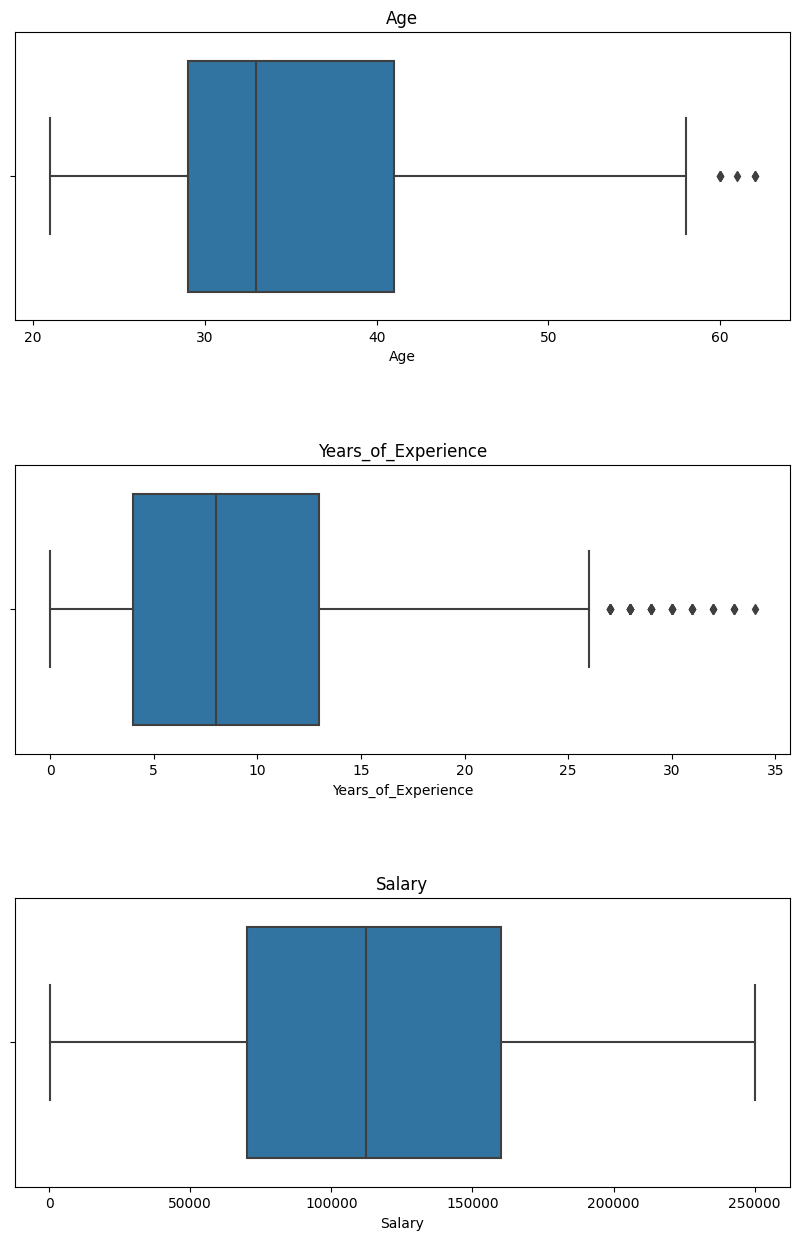

In [129]:
cols_num = ['Age', 'Years_of_Experience', 'Salary']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,15))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

### Visuluzación de correlación de data

Correlación entre Age y Salary: 0.7637688284080536


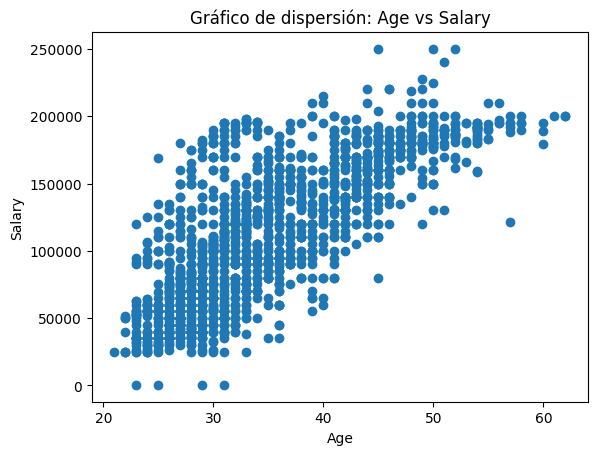

In [130]:
# Calcular la correlación entre las dos columnas
correlation = data['Age'].corr(data['Salary'])
print("Correlación entre Age y Salary:", correlation)

# Crear un gráfico de dispersión para visualizar la relación
plt.scatter(data['Age'], data['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Gráfico de dispersión: Age vs Salary')
plt.show()

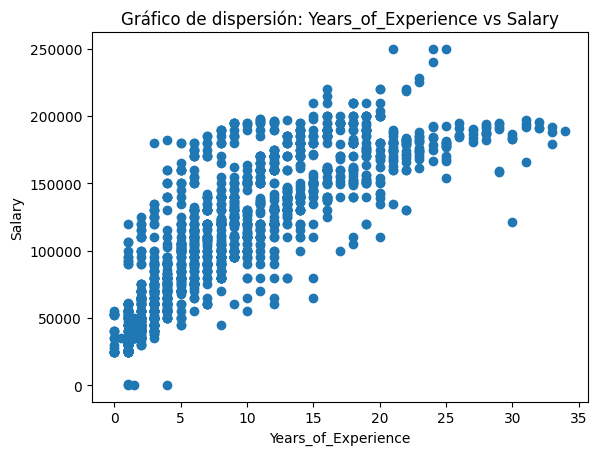

In [131]:
# Crear un gráfico de dispersión para visualizar la relación
plt.scatter(data['Years_of_Experience'], data['Salary'])
plt.xlabel('Years_of_Experience')
plt.ylabel('Salary')
plt.title('Gráfico de dispersión: Years_of_Experience vs Salary')
plt.show()

In [132]:
data['Salary'].describe()

count      1731.000000
mean     113777.577701
std       51562.477847
min         350.000000
25%       70000.000000
50%      112439.000000
75%      160000.000000
max      250000.000000
Name: Salary, dtype: float64

### Prueba sin outliers

In [133]:
data_sin_outliers = data.copy()

#### Edad

In [164]:
while True:
    Q1 = data_sin_outliers['Age'].quantile(0.25)
    Q3 = data_sin_outliers['Age'].quantile(0.75)
    IQR = Q3 - Q1

    bigotes_superior =  (Q1 + 1.5 * IQR)
    bigotes_inferior =  (Q1 - 1.5 * IQR)

    ubicacion_outliers =  (data_sin_outliers['Age'] < bigotes_inferior) | (data_sin_outliers['Age'] > bigotes_superior )
    
    if ubicacion_outliers.sum() == 0:
        # No quedan outliers, detener el proceso
        break
    
    # Eliminar los outliers y actualizar el DataFrame
    data_sin_outliers = data_sin_outliers[~ubicacion_outliers]

print("\nDatos sin outliers:\n", data_sin_outliers)


Datos sin outliers:
        Age  Gender Education_Level  Years_of_Experience    Salary    Job_Title
0     32.0    male      bachelor's                  5.0   90000.0     Engineer
1     28.0  female        master's                  3.0   65000.0      Analyst
3     36.0  female      bachelor's                  7.0   60000.0    Associate
5     29.0    male      bachelor's                  2.0   55000.0      Analyst
7     31.0    male      bachelor's                  4.0   80000.0      Manager
8     26.0  female      bachelor's                  1.0   45000.0  Coordinator
10    29.0    male        master's                  3.0   75000.0    Developer
12    35.0    male      bachelor's                  6.0   65000.0      Analyst
14    27.0    male      bachelor's                  2.0   40000.0          Rep
16    33.0  female        master's                  7.0   90000.0      Manager
18    25.0  female      bachelor's                  0.0   35000.0        Clerk
20    34.0  female        mast

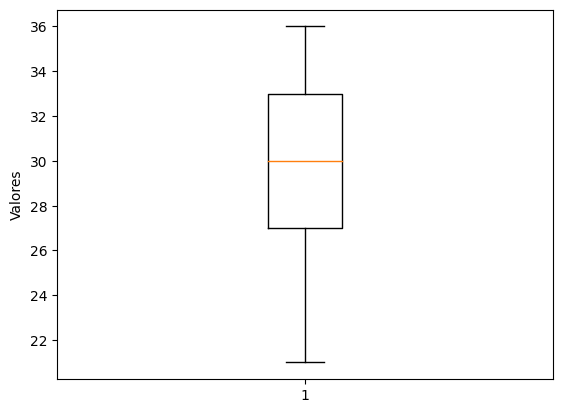

In [165]:
plt.boxplot(data_sin_outliers['Age'])
plt.ylabel('Valores')
plt.show()

### Prueba con los outliers intáctos

#### Edad

In [146]:
data['Age'].describe()

count    1731.000000
mean       35.173888
std         8.217726
min        21.000000
25%        29.000000
50%        33.000000
75%        41.000000
max        62.000000
Name: Age, dtype: float64

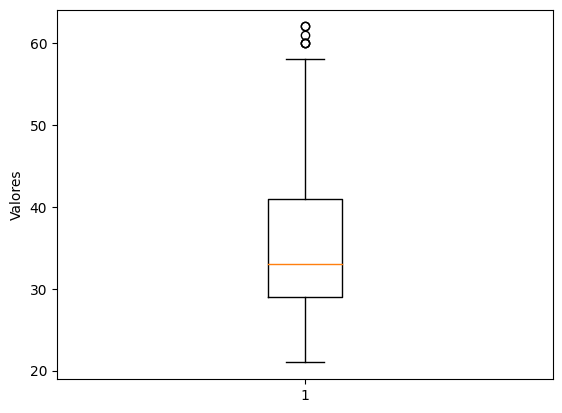

In [147]:
plt.boxplot(data['Age'])
plt.ylabel('Valores')
plt.show()